E:\anaconda\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
E:\anaconda\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
E:\anaconda\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array i

1.99 % [>--------------------------------------------------] 4/4 	 used:0 s  eta:20 s

4.48 % [==>------------------------------------------------] 9/9 	 used:0 s  eta:18 s

6.97 % [===>-----------------------------------------------] 14/14 	 used:1 s  eta:17 s

9.45 % [====>----------------------------------------------] 19/19 	 used:1 s  eta:16 s

11.94 % [=====>---------------------------------------------] 24/24 	 used:2 s  eta:16 s

14.43 % [=======>-------------------------------------------] 29/29 	 used:2 s  eta:15 s

16.92 % [========>------------------------------------------] 34/34 	 used:3 s  eta:14 s

19.40 % [=========>-----------------------------------------] 39/39 	 used:3 s  eta:14 s

21.89 % [==========>----------------------------------------] 44/44 	 used:3 s  eta:14 s

24.38 % [============>--------------------------------------] 49/49 	 used:4 s  eta:13 s

26.87 % [=============>-------------------------------------] 54/54 	 used:4 s  eta:13 s

29.35 % [==============>------------------------------------] 59/59 	 used:5 s  eta:12 s

31.84 % [===============>-----------------------------------] 64/64 	 used:5 s  eta:12 s

34.33 % [=================>---------------------------------] 69/69 	 used:6 s  eta:12 s

36.82 % [==================>--------------------------------] 74/74 	 used:6 s  eta:11 s

39.30 % [===================>-------------------------------] 79/79 	 used:7 s  eta:11 s

41.79 % [====================>------------------------------] 84/84 	 used:7 s  eta:10 s

44.28 % [======================>----------------------------] 89/89 	 used:8 s  eta:10 s

46.77 % [=======================>---------------------------] 94/94 	 used:8 s  eta:10 s

49.25 % [========================>--------------------------] 99/99 	 used:9 s  eta:9 s

51.74 % [=========================>-------------------------] 104/104 	 used:9 s  eta:9 s

54.23 % [===========================>-----------------------] 109/109 	 used:10 s  eta:8 s

56.72 % [============================>----------------------] 114/114 	 used:10 s  eta:8 s

59.20 % [=============================>---------------------] 119/119 	 used:11 s  eta:7 s

61.69 % [==============================>--------------------] 124/124 	 used:11 s  eta:7 s

64.18 % [================================>------------------] 129/129 	 used:12 s  eta:6 s

66.67 % [=================================>-----------------] 134/134 	 used:12 s  eta:6 s

69.15 % [==================================>----------------] 139/139 	 used:13 s  eta:5 s

71.64 % [===================================>---------------] 144/144 	 used:13 s  eta:5 s

74.13 % [=====================================>-------------] 149/149 	 used:14 s  eta:4 s

76.62 % [======================================>------------] 154/154 	 used:14 s  eta:4 s

79.10 % [=======================================>-----------] 159/159 	 used:15 s  eta:3 s

81.59 % [========================================>----------] 164/164 	 used:15 s  eta:3 s

84.08 % [==========================================>--------] 169/169 	 used:15 s  eta:3 s

86.57 % [===========================================>-------] 174/174 	 used:16 s  eta:2 s

89.05 % [============================================>------] 179/179 	 used:16 s  eta:2 s

91.54 % [=============================================>-----] 184/184 	 used:17 s  eta:1 s

94.03 % [===============================================>---] 189/189 	 used:17 s  eta:1 s

96.52 % [================================================>--] 194/194 	 used:18 s  eta:0 s

99.00 % [=================================================>-] 199/199 	 used:18 s  eta:0 s(201, 1561, 39) (201, 1)


E:\anaconda\envs\tensorflow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(140, 1561, 39) (61, 1561, 39) (140, 2) (61, 2)
61/61 [==============================] - 1s 19ms/step
test accuracy: [0.20873000607138775, 0.9344262314624474]


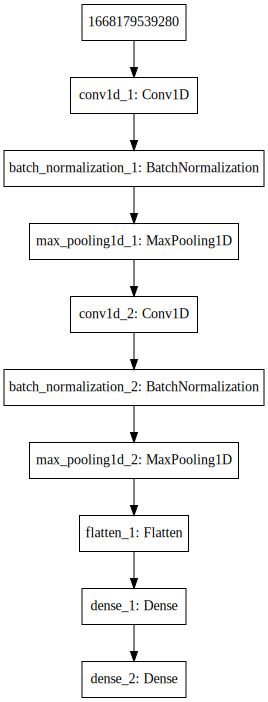

In [1]:
import os

# 训练样本路径

# 此处修改
ROOT_DIR=os.path.abspath('.')
wav_path = os.path.join(ROOT_DIR,"hd_signal_keras_train")
# wav_path = 'E:/Dataset/hd_signal_keras_train'
# 获得训练用的wav文件路径列表
def get_wav_files(wav_path=wav_path):
    wav_files = []
    for (dirpath, dirnames, filenames) in os.walk(wav_path):
        for filename in filenames:
            if filename.endswith('.wav') or filename.endswith('.WAV'):
                filename_path = os.sep.join([dirpath, filename])
                if os.stat(filename_path).st_size < 240000:  # 剔除掉一些小文件
                    continue
                wav_files.append(filename_path)
    return wav_files

"""
文件名的形式是

wav_files[4].split("\\")
['wav/train', 'A11', 'A11_101.WAV']
A11就是编号A11的人说的话了

然后需要抽取这些语音的mfcc特征,这里借助一个python_speech_features的库来取,
根据某一篇论文的描述，此处不光抽取了13阶mfcc特征，还抽取了这13阶特征的一阶差值和二阶差值，一共是39维特征：
"""

wav_files = get_wav_files()

import sys
import os
import time
import librosa
import numpy as np
import python_speech_features
import scipy
import scipy.io.wavfile as wav
from python_speech_features import mfcc
from sklearn import preprocessing

train_x = []
train_y = []
begin_time = time.time()
for i, onewav in enumerate(wav_files):
    if i % 5 == 4:  # 运行5个路径名后。
        gaptime = time.time() - begin_time
        percent = float(i) * 100 / len(wav_files)
        eta_time = gaptime * 100 / (percent + 0.01) - gaptime
        strprogress = "[" + "=" * int(percent // 2) + ">" + "-" * int(50 - percent // 2) + "]"
        str_log = ("%.2f %% %s %s/%s \t used:%d s  eta:%d s" % (percent, strprogress, i, len(train_y), gaptime, eta_time))
        sys.stdout.write('\r' + str_log)

    elements = onewav.split("\\")
    for x in elements:
        if (x == 'metalnode' or x == 'diode'):
            label = x


    (rate, sign) = wav.read(onewav)

    # for i in range(len(sign)):
    #     if sign[i, 0] > 10 or sign[i, 1] < -10:
    #         sig = sign[i:(i + 220500)].copy()
    #         break
    # 需加入音频分段程序。添加对应标签！！！！
    # mfcc_feat = mfcc(scipy.signal.resample(sig, len(sig) // 2), rate // 2)  # 使用FFT重采样n个点。
    mfcc_feat = mfcc(scipy.signal.resample(sign, len(sign) // 2), rate // 2)

    mfcc_feat_div = np.concatenate((mfcc_feat[[0]], mfcc_feat[:-1]))  # 数组拼接。
    mfcc_feat_div_div = mfcc_feat_div - np.concatenate((mfcc_feat_div[[0]], mfcc_feat_div[:-1]))
    finalfeature = np.concatenate((mfcc_feat, mfcc_feat_div, mfcc_feat_div_div), axis=1)

    train_x.append(finalfeature)  # 更新列表。
    train_y.append(label)  # 更新列表。

# 然后把输入和输出分别处理成矩阵的形式，并且统一输入的长度：
yy = preprocessing.LabelBinarizer().fit_transform(train_y)  # 将train_y标签二值化。yy.shape(201,1)
train_x = [np.concatenate((i, np.zeros((1561 - i.shape[0], 39)))) for i in train_x]

train_x = np.asarray(train_x)  # (201,1561,39)
train_y = np.asarray(yy)  # (201,1)
print(train_x.shape, train_y.shape)

from keras.utils.np_utils import to_categorical
train_y=to_categorical(train_y, num_classes=2)  # (201,2)

"""
上面的代码会输出

((9709, 1561, 39), (9709, 25))
分别是训练集和测试集的形状
-------(40, 1561, 39) (40, 40)---------
把训练集和测试集分开：
"""

# 此处修改
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
x_max=max(np.max(X_train),np.max(X_test)) #112.95
"""
上面的代码会输出：
((140, 1561, 39), (61, 1561, 39), (140, 2), (61, 2))
------(28, 1561, 39) (12, 1561, 39) (28, 40) (12, 40)------
所以训练集和测试集分别有6796和2913条数据，然使用keras构建一个1d卷积模型：
"""
from keras.models import Sequential,load_model
from keras.layers import LSTM, Dense, Activation, SimpleRNN, Conv1D, MaxPool1D, Flatten, Reshape, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from keras.metrics import categorical_accuracy


task='evaluate' #train or evaluate or predict
if task=='train':
    model = Sequential()
    model.add(Conv1D(32, 4, input_shape=(300, 39)))
    model.add(BatchNormalization())
    model.add(MaxPool1D(4))
    model.add(Conv1D(64, 4))
    model.add(BatchNormalization())
    model.add(MaxPool1D(4))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax')) # model.summary()
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=[categorical_accuracy])

    # 然后训练这个模型：
    # early_stopping = EarlyStopping(monitor='val_loss', patience=20)#早停法。
    # model.fit(X_train[:, 200:500, :], y_train, validation_data=(X_test[:, 200:500, :], y_test), callbacks=[early_stopping],batch_size=9, epochs=1000)
    model.fit(X_train[:, 200:500, :], y_train, validation_data=(X_test[:, 200:500, :], y_test), batch_size=10, epochs=50)

    # 模型评估一。
    # loss,accuracy = model.evaluate(X_test[:, 200:500, :], y_test, batch_size=16)
    # print('\nModel test loss',loss)
    # print('test accuracy',accuracy)

    #模型评估二。
    # score = model.evaluate(X_test[:, 200:500, :], y_test, verbose = 0)
    # print('\nTest score:',score[0])
    # print('Test accuracy:',score[1])

    # 保存模型。
    model.save('voice_recog.h5') # HDF5文件，pip install h5py。

elif task=='evaluate':
    model=load_model('voice_recog.h5')
    accuracy = model.evaluate(X_test[:, 200:500, :], y_test, batch_size=16)
    print('test accuracy:',accuracy)
elif task=='predict':
    model=load_model('voice_recog.h5')
    result=model.predict_on_batch(X_test[:, 200:500, :])
    print(result)

# 模型可视化。需提前pip install graphviz\pydot\libgd\freetype\fontconfig\gperf。
# from keras.utils.vis_utils import plot_model
# plot_model(model,to_file="model.png",show_shapes=True)
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))